In [1]:
import os  # OS module to interact with the file system
import librosa  # Librosa for audio processing
import librosa.display  # For visualizing audio signals
import numpy as np  # NumPy for numerical computations
import matplotlib.pyplot as plt  # Matplotlib for plotting
import tensorflow as tf  # TensorFlow for deep learning
from tensorflow.keras.models import Sequential  # Sequential model for building neural networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GRU, Reshape  # Layers for CNN and RNN
from tensorflow.keras.utils import to_categorical  # Converts labels to one-hot encoding
from sklearn.model_selection import train_test_split  # Splitting dataset into training and testing
from sklearn.preprocessing import LabelEncoder  # Encoding categorical labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report  # Metrics for evaluating model
import seaborn as sns  # Seaborn for visualization
from tqdm import tqdm  # Progress bar for loops
import glob  # Finding file paths

In [2]:
# Constants for audio processing
SAMPLE_RATE = 22050  # Standard sampling rate for audio
DURATION = 3  # Clip duration in seconds
N_MELS = 128  # Number of Mel spectrogram filters
INPUT_SHAPE = (128, 128, 1)  # Shape of input images for CNN
DATA_PATH = "E:/capstone/Deep_Fake/dd_total"  # Path to dataset

In [3]:
# Function to extract Mel spectrogram features from an audio file
def extract_features(file_path, max_pad_len=128):
    try:
        audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)  # Load audio file
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=N_MELS)  # Compute Mel spectrogram
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to log scale
        
        # Padding or truncating spectrogram to a fixed length
        if mel_spec.shape[1] < max_pad_len:
            pad_width = max_pad_len - mel_spec.shape[1]
            mel_spec = np.pad(mel_spec, ((0, 0), (0, pad_width)), mode='constant')
        else:
            mel_spec = mel_spec[:, :max_pad_len]
        
        return mel_spec  # Return processed spectrogram
    except Exception as e:
        print(f"Error processing {file_path}: {e}")  # Print error if file processing fails
        return None

In [4]:
# Function to load and process dataset
def load_dataset():
    X, y = [], []  # Lists to store features and labels
    fake_files = glob.glob(os.path.join(DATA_PATH, "fake", "*.wav")) + glob.glob(os.path.join(DATA_PATH, "fake", "*.mp3"))  # Load fake audio files
    real_files = glob.glob(os.path.join(DATA_PATH, "real", "*.wav")) + glob.glob(os.path.join(DATA_PATH, "real", "*.mp3"))  # Load real audio files
    
    # Process fake audio files
    for file in tqdm(fake_files, desc="Processing Fake Audio"):
        features = extract_features(file)
        if features is not None:
            X.append(features)
            y.append("fake")
    
    # Process real audio files
    for file in tqdm(real_files, desc="Processing Real Audio"):
        features = extract_features(file)
        if features is not None:
            X.append(features)
            y.append("real")
    
    return np.array(X), np.array(y)  # Return feature and label arrays

In [5]:
# Load Data
X, y = load_dataset()
X = X[..., np.newaxis]  # Add channel dimension

# Encode Labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y) #converts labels to one-hot encoding

Processing Fake Audio:  22%|██▏       | 5946/26941 [01:38<06:52, 50.92it/s]C:\Users\vuggi\AppData\Local\Temp\ipykernel_7408\51714381.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)  # Load audio file
c:\Users\vuggi\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing Fake Audio:  22%|██▏       | 5954/26941 [01:38<06:23, 54.73it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file13424.mp3: 


Processing Fake Audio:  29%|██▊       | 7742/26941 [02:11<05:34, 57.35it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file15746.mp3: 


Processing Fake Audio:  31%|███▏      | 8438/26941 [02:24<05:35, 55.12it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file16643.mp3: 


Processing Fake Audio:  33%|███▎      | 9009/26941 [02:35<06:12, 48.13it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file17407.mp3: 


Processing Fake Audio:  34%|███▎      | 9043/26941 [02:36<05:37, 52.96it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file17450.mp3: 


Processing Fake Audio:  40%|████      | 10882/26941 [03:11<05:12, 51.47it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file19851.mp3: 


Processing Fake Audio:  61%|██████▏   | 16530/26941 [05:09<03:34, 48.62it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file27206.mp3: 


Processing Fake Audio:  63%|██████▎   | 16882/26941 [05:17<03:14, 51.83it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file27643.mp3: 


Processing Fake Audio:  63%|██████▎   | 17024/26941 [05:20<03:30, 47.19it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file27839.mp3: 


Processing Fake Audio:  72%|███████▏  | 19470/26941 [06:17<02:41, 46.29it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file30959.mp3: 


Processing Fake Audio:  72%|███████▏  | 19513/26941 [06:18<02:50, 43.45it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file31017.mp3: 


Processing Fake Audio:  78%|███████▊  | 21044/26941 [06:58<02:26, 40.27it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file32972.mp3: 


Processing Fake Audio:  87%|████████▋ | 23343/26941 [07:56<01:22, 43.73it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file5323.mp3: 


Processing Fake Audio: 100%|█████████▉| 26848/26941 [09:28<00:02, 38.90it/s]

Error processing E:/capstone/Deep_Fake/dd_total\fake\file9875.mp3: 


Processing Real Audio: 100%|██████████| 26941/26941 [15:24<00:00, 29.14it/s]


In [6]:
# Split Dataset into training & testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
# Function to build the CRNN model
def build_crnn():
    model = Sequential([
        # CNN Layers
        Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE),  # First Conv2D layer
        BatchNormalization(),  # Normalize activations
        MaxPooling2D((2, 2)),  # Reduce spatial dimensions
        Dropout(0.3),  # Prevent overfitting

        Conv2D(64, (3, 3), activation='relu'),  # Second Conv2D layer
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(128, (3, 3), activation='relu'),  # Third Conv2D layer
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        # Flatten & Reshape for GRU layers
        Reshape((-1, 128)),  # Convert CNN output to time series format

        # GRU Layers
        GRU(128, return_sequences=True),  # First GRU layer with sequence output
        GRU(64),  # Second GRU layer
        Dropout(0.4),  # Prevent overfitting

        # Fully connected layers
        Dense(128, activation='relu'),  # Fully connected layer
        Dropout(0.4),  # Dropout for regularization
        Dense(2, activation='softmax')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile model
    return model


In [8]:
# Build and compile the model
model = build_crnn()
model.summary()  # Print model summary

# Train the model
epochs = 5  # Number of training epochs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)  # Train the model


c:\Users\vuggi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 196, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 196, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,466 (931.51 KB)

 Trainable params: 238,018 (929.76 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/5
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 995s 731ms/step - accuracy: 0.9412 - loss: 0.1602 - val_accuracy: 0.9885 - val_loss: 0.0372
Epoch 2/5
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 958s 711ms/step - accuracy: 0.9929 - loss: 0.0257 - val_accuracy: 0.9793 - val_loss: 0.0758
Epoch 3/5
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 962s 714ms/step - accuracy: 0.9967 - loss: 0.0108 - val_accuracy: 0.9128 - val_loss: 0.2746
Epoch 4/5
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 966s 717ms/step - accuracy: 0.9958 - loss: 0.0123 - val_accuracy: 0.7867 - val_loss: 0.7674
Epoch 5/5
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 1023s 759ms/step - accuracy: 0.9970 - loss: 0.0105 - val_accuracy: 0.9627 - val_loss: 0.1859


In [9]:
# Evaluate Model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
337/337 ━━━━━━━━━━━━━━━━━━━━ 51s 151ms/step - accuracy: 0.9613 - loss: 0.1964
Test Accuracy: 96.27%
337/337 ━━━━━━━━━━━━━━━━━━━━ 52s 152ms/step


In [14]:
# Metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes)
recall = recall_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.4f}")

Accuracy: 96.27%
Precision: 0.93
Recall: 1.00
F1 Score: 0.96
Error Rate: 0.0373


In [11]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['Fake', 'Real']))

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      0.93      0.96      5386
        Real       0.93      1.00      0.96      5388

    accuracy                           0.96     10774
   macro avg       0.97      0.96      0.96     10774
weighted avg       0.97      0.96      0.96     10774



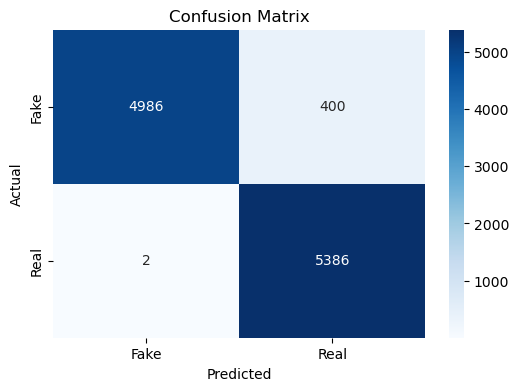

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Saving trained Model
model.save("deepfake_audio_crnn.h5")